<a href="https://colab.research.google.com/github/Davidsb04/breast-cancer-detection/blob/main/breast_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Informações dos dados

Dataset link: https://www.kaggle.com/datasets/wasiqaliyasir/breast-cancer-dataset

The 30 features are grouped into three main categories based on the characteristics of cell nuclei:

Mean: Average values of measurements (e.g., mean radius, mean texture).
Standard Error (SE): Variability of measurements (e.g., standard error of radius, standard error of area).
Worst: Largest (worst) values of measurements (e.g., worst radius, worst smoothness).

Each category includes 10 specific measurements:

- Radius (mean of distances from center to points on the perimeter)
- Texture (standard deviation of grayscale values)
- Perimeter
- Area
- Smoothness (local variation in radius lengths)
- Compactness (perimeter² / area - 1.0)
- Concavity (severity of concave portions of the contour)
- Concave points (number of concave portions of the contour)
- Symmetry
- Fractal dimension ("coastline approximation" - 1)


# Preparando os Dados

In [ ]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, accuracy_score

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore")
pd.options.display.float_format = '{:.2f}'.format

In [ ]:
db_original = pd.read_csv('Breast_cancer_dataset.csv')

In [ ]:
db_original.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,NaN
1,842517,M,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,NaN
2,84300903,M,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,NaN
3,84348301,M,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,NaN
4,84358402,M,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,NaN


In [ ]:
db_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
db_original.groupby(['diagnosis']).size()

,0
diagnosis,
B,357
M,212


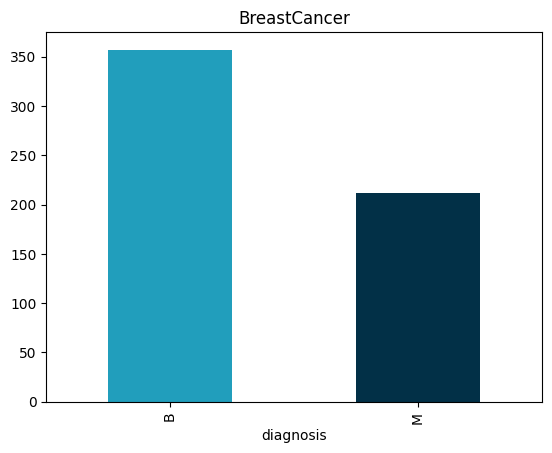

In [ ]:
db_original.diagnosis.value_counts().plot(kind='bar', title='BreastCancer', color = ['#219ebc', '#023047']);

In [ ]:
db_original['diagnosis'] = db_original['diagnosis'].astype('category')

In [ ]:
db_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   id                       569 non-null    int64   
 1   diagnosis                569 non-null    category
 2   radius_mean              569 non-null    float64 
 3   texture_mean             569 non-null    float64 
 4   perimeter_mean           569 non-null    float64 
 5   area_mean                569 non-null    float64 
 6   smoothness_mean          569 non-null    float64 
 7   compactness_mean         569 non-null    float64 
 8   concavity_mean           569 non-null    float64 
 9   concave points_mean      569 non-null    float64 
 10  symmetry_mean            569 non-null    float64 
 11  fractal_dimension_mean   569 non-null    float64 
 12  radius_se                569 non-null    float64 
 13  texture_se               569 non-null    float64 
 14  perimeter_

In [ ]:
variaveis_numericas = []
for i in db_original.columns[2:32].tolist():
  if db_original.dtypes[i] == 'float64':
    variaveis_numericas.append(i)

In [ ]:
len(variaveis_numericas)

30

In [ ]:
variaveis_categoricas = []
for i in db_original.columns[0:32].tolist():
  if db_original.dtypes[i] == 'category':
    variaveis_categoricas.append(i)

In [ ]:
lb = LabelEncoder()

for var in variaveis_categoricas:
  db_original[var] = lb.fit_transform(db_original[var])

In [ ]:
variavel_target = db_original.diagnosis.value_counts()
variavel_target

,count
diagnosis,
0,357
1,212


In [ ]:
PREDITORAS = db_original.iloc[:, 2:32]
TARGET = db_original.iloc[:, 1]

In [ ]:
seed = 100

balanceador = SMOTE(random_state=seed)

PREDITORAS_RES, TARGET_RES = balanceador.fit_resample(PREDITORAS, TARGET)

In [ ]:
variavel_target = TARGET_RES.value_counts()
variavel_target

,count
diagnosis,
1,357
0,357


In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(PREDITORAS_RES, TARGET_RES, test_size=0.3, random_state=42)

In [ ]:
Normalizador = MinMaxScaler()
X_treino_normalizados = Normalizador.fit_transform(X_treino)
X_teste_normalizados = Normalizador.transform(X_teste)

# Criando, Treinando e Avaliando os Modelos de Machine Learning

In [ ]:
clf = RandomForestClassifier(n_estimators  = 300, criterion = 'entropy', max_depth = 10,
                             max_features = 'sqrt', min_samples_leaf = 2, min_samples_split = 2, n_jobs = 8)


clf = clf.fit(X_treino_normalizados, Y_treino)

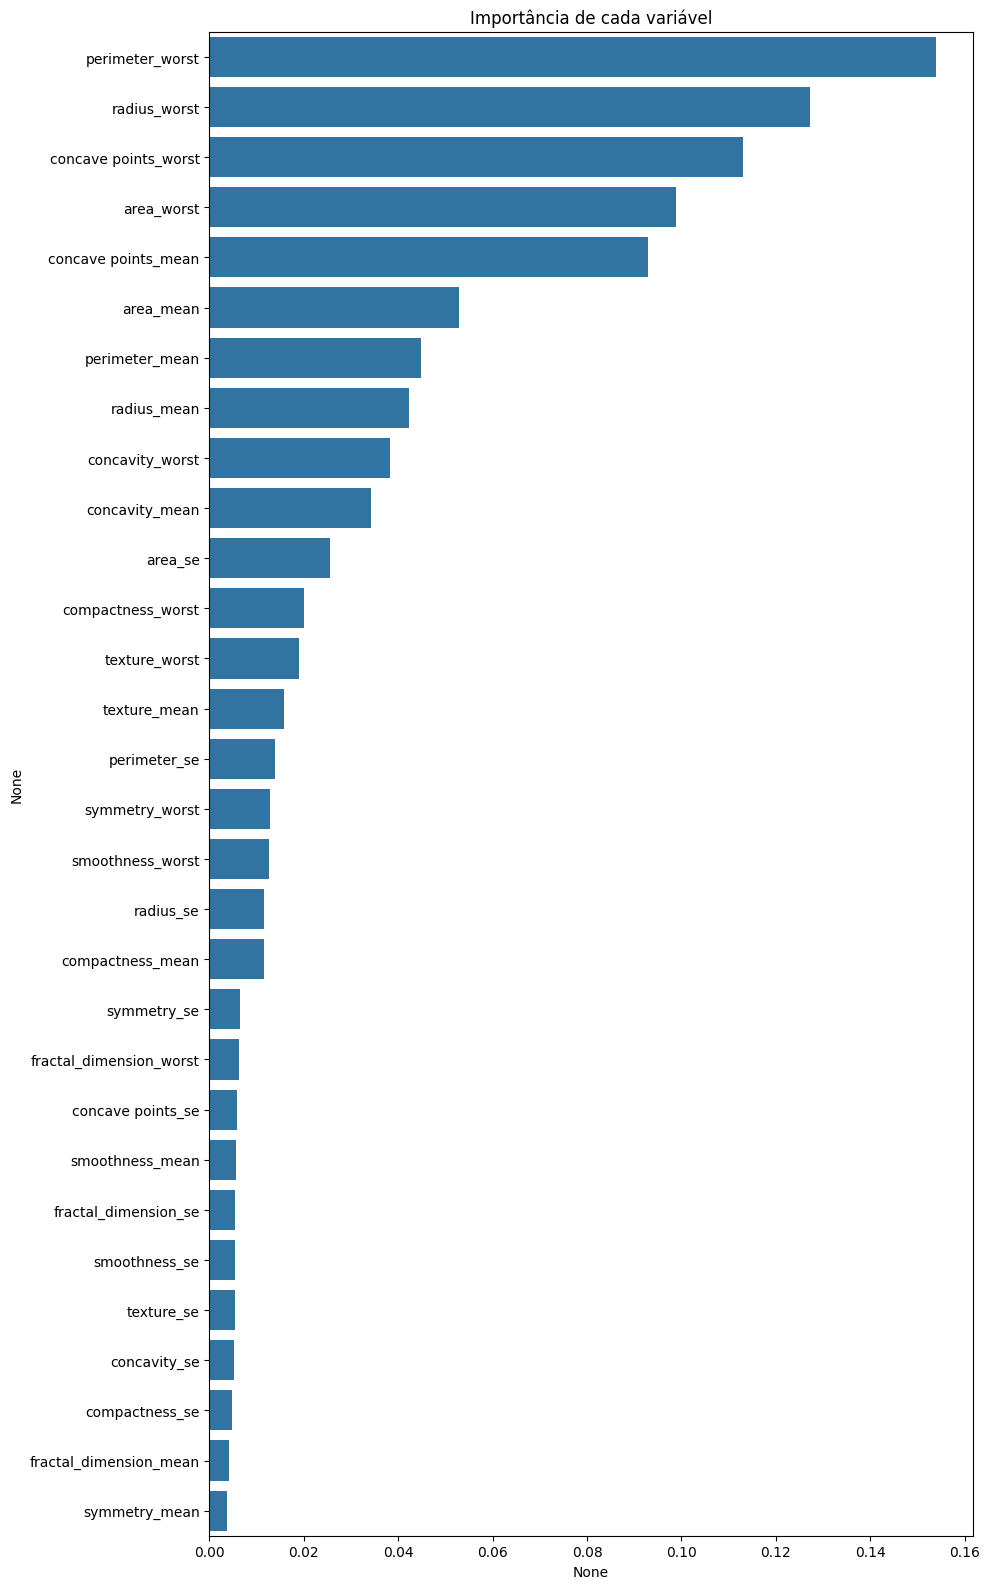

In [ ]:
plt.rcParams["figure.figsize"] = [10.00, 16.00]
plt.rcParams["figure.autolayout"] = True

importances = pd.Series(data=clf.feature_importances_, index=PREDITORAS.columns)
importances = importances.sort_values(ascending = False)
sns.barplot(x=importances, y=importances.index, orient='h').set_title('Importância de cada variável')
plt.show()

In [ ]:
scores = clf.score(X_treino_normalizados, Y_treino)
scores

0.9979959919839679

In [ ]:
scores = clf.score(X_teste_normalizados, Y_teste)
scores

0.9720930232558139

In [ ]:
y_pred = clf.predict(X_teste_normalizados)
print(accuracy_score(Y_teste, y_pred)*100)

97.20930232558139


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_teste, y_pred)
print(cm)

[[108   5]
 [  1 101]]


In [ ]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix= cm, display_labels= ["Sim", "Não"])

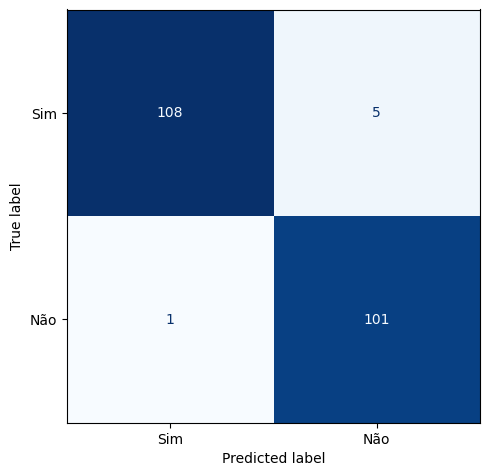

In [ ]:
plt.rcParams["figure.figsize"] = [5.00, 5.00]
plt.rcParams["figure.autolayout"] = True
cm_disp.plot(include_values=True, cmap= 'Blues', colorbar=None)